***
# <font color=yellow size=10>Pokemon</font>
***

##  Pokemon Data Analysis

The main idea of this project is just fun. Extract information and insights about pokemon dataset. The first project will be focus on basic statistics.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
pokemon = pd.read_csv('Pokemon.csv')
pokemon

,#,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [5]:
sorted(pokemon['Type_1'].unique())

['Bug',
 'Dark',
 'Dragon',
 'Electric',
 'Fairy',
 'Fighting',
 'Fire',
 'Flying',
 'Ghost',
 'Grass',
 'Ground',
 'Ice',
 'Normal',
 'Poison',
 'Psychic',
 'Rock',
 'Steel',
 'Water']

In [6]:
frequency = pokemon['Type_1'].value_counts()
frequency

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Rock         44
Electric     44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type_1, dtype: int64

In [7]:
percentage = pokemon['Type_1'].value_counts(normalize = True)*100
percentage

Water       14.000
Normal      12.250
Grass        8.750
Bug          8.625
Psychic      7.125
Fire         6.500
Rock         5.500
Electric     5.500
Dragon       4.000
Ground       4.000
Ghost        4.000
Dark         3.875
Poison       3.500
Steel        3.375
Fighting     3.375
Ice          3.000
Fairy        2.125
Flying       0.500
Name: Type_1, dtype: float64

In [8]:
frequency_distribution = pd.DataFrame({'Frequency':frequency, 'Percentage (%)':percentage})
frequency_distribution

,Frequency,Percentage (%)
Water,112,14.000
Normal,98,12.250
Grass,70,8.750
Bug,69,8.625
Psychic,57,7.125
Fire,52,6.500
Rock,44,5.500
Electric,44,5.500
Dragon,32,4.000
Ground,32,4.000


<AxesSubplot:>

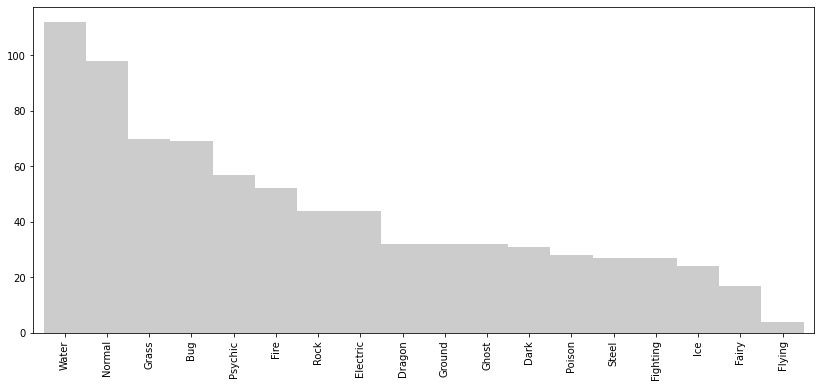

In [9]:
frequency_distribution['Frequency'].plot.bar(width = 1, color = 'black', alpha = 0.2, figsize=(14, 6))

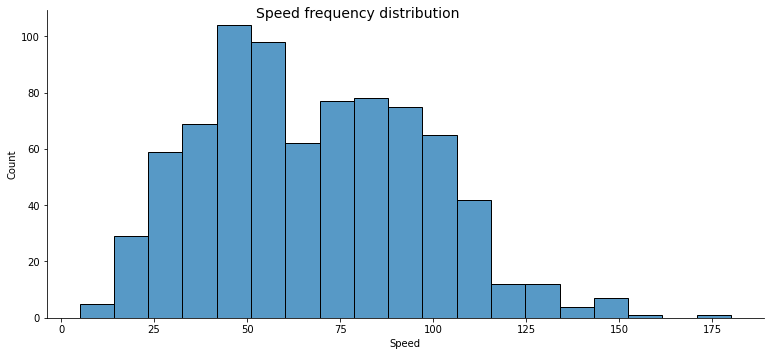

In [10]:
# histogram speed frequency distribution
ax = sns.displot(pokemon['Speed'])
ax.figure.set_size_inches(12, 5)
ax.fig.suptitle("Speed frequency distribution",
                  fontsize=14, fontdict={"weight": "bold"})
ax

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Speed frequency distribution --- No Legendary '}, xlabel='Speed', ylabel='Density'>

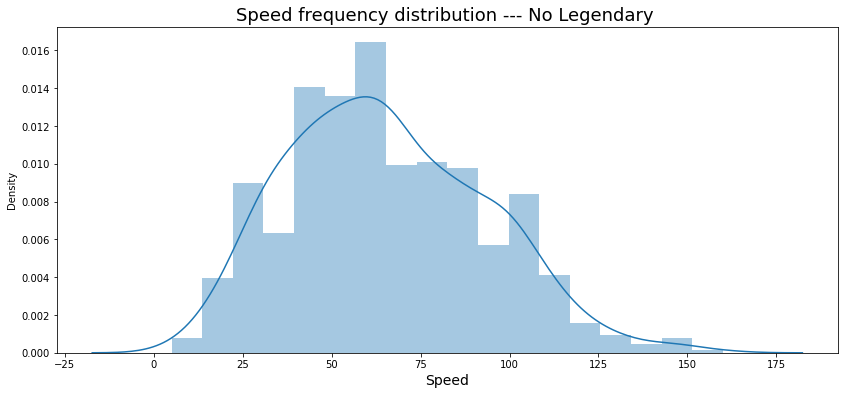

In [11]:
# histogram Speed, no legendary included
ax = sns.distplot(pokemon.query('Legendary == False')['Speed'])
ax.figure.set_size_inches(14, 6)
ax.set_title('Speed frequency distribution --- No Legendary ', fontsize=18)
ax.set_xlabel('Speed', fontsize=14)
ax

In [20]:
# Basics informations
atk_by_type1_and_geration = pd.crosstab(pokemon['Type_1'],
                                        pokemon.Generation,
                                        values = pokemon.Attack,
                                        aggfunc={'mean','median','max'})
atk_by_type1_and_geration

max                                           mean              \
Generation      1      2      3      4      5      6           1           2   
Type_1                                                                         
Bug         155.0  185.0   90.0   94.0  135.0   52.0   76.428571   85.416667   
Dark          NaN   95.0  150.0  125.0  125.0  131.0         NaN   80.833333   
Dragon      134.0    NaN  180.0  170.0  170.0  100.0   94.000000         NaN   
Electric     90.0   95.0   75.0  123.0  115.0   58.0   62.000000   64.714286   
Fairy        70.0  120.0    NaN   50.0    NaN  131.0   57.500000   57.000000   
Fighting    130.0   95.0  120.0  145.0  140.0  124.0  102.857143   65.000000   
Fire        130.0  130.0  160.0  104.0  140.0  110.0   88.642857   76.250000   
Flying        NaN    NaN    NaN    NaN  115.0   70.0         NaN         NaN   
Ghost        65.0   60.0  165.0  120.0   55.0  110.0   53.750000   60.000000   
Grass       105.0   82.0  130.0  132.0   98.0  107.0   72.923077   57.000000   
Ground      130.0  120.0  180.0  140.0  145.0    NaN   81.875000   85.000000   
Ice          85.0  100.0  120.0  130.0  110.0  117.0   67.500000   58.750000   
Normal      125.0  130.0  160.0  160.0  128.0   80.0   70.625000   63.133333   
Poison      105.0   90.0  100.0  106.0   95.0   75.0   74.428571   90.000000   
Psychic     190.0  100.0  180.0  165.0  100.0  160.0   79.181818   69.285714   
Rock        135.0  164.0  125.0  165.0  140.0  160.0   87.500000  109.200000   
Steel         NaN  125.0  145.0  120.0  100.0  150.0         NaN   96.666667   
Water       155.0  105.0  150.0  120.0  108.0   95.0   74.193548   68.111111   

                                                          median         \
Generation           3           4           5          6      1      2   
Type_1                                                                    
Bug          55.833333   62.600000   77.611111  36.333333   67.5   77.5   
Dark         97.500000  111.666667   81.384615  92.333333    NaN   87.5   
Dragon      113.333333  115.000000  129.000000  81.250000   84.0    NaN   
Electric     57.000000   73.583333   88.750000  50.333333   60.0   63.0   
Fairy              NaN   50.000000         NaN  66.222222   57.5   40.0   
Fighting     76.000000  108.333333  108.571429  99.333333  105.0   65.0   
Fire         98.750000   85.000000   87.444444  69.375000   90.0   69.5   
Flying             NaN         NaN  107.500000  50.000000    NaN    NaN   
Ghost        93.000000   86.000000   41.000000  81.400000   57.5   60.0   
Grass        77.923077   84.000000   65.333333  82.200000   75.0   55.0   
Ground      101.428571  104.750000  102.500000        NaN   80.0   75.0   
Ice          68.571429   90.000000   73.333333  93.000000   67.5   52.5   
Normal       69.888889   83.055556   83.315789  55.500000   67.5   70.0   
Poison       72.000000   77.166667   72.500000  67.500000   76.0   90.0   
Psychic      70.666667   90.000000   52.500000  82.800000   50.0   72.0   
Rock         79.625000   86.500000  116.000000  90.333333   87.5  100.0   
Steel        98.750000   77.666667   81.250000  94.000000    NaN   85.0   
Water        80.666667   72.461538   73.277778  68.000000   70.0   70.0   

                                       
Generation      3      4      5     6  
Type_1                                 
Bug          48.5   72.5   72.5  35.0  
Dark         87.5  120.0   85.0  92.0  
Dragon      105.0  110.0  120.0  87.5  
Electric     50.0   65.0   92.5  55.0  
Fairy         NaN   50.0    NaN  65.0  
Fighting     60.0  110.0  105.0  92.0  
Fire         92.5   90.0   93.0  68.5  
Flying        NaN    NaN  107.5  50.0  
Ghost        75.0   92.0   40.0  77.5  
Grass        70.0   92.0   60.0  78.0  
Ground      100.0  103.5  101.0   NaN  
Ice          60.0   80.0   67.5  93.0  
Normal       67.5   81.0   80.0  53.0  
Poison       73.0   76.5   72.5  67.5  
Psychic      57.5   90.0   55.0  48.0  
Rock         88.0   67.5  120.5  89.0

In [18]:
#checking out some informations
for i, val in enumerate(pokemon['Type_2']):
        if(pokemon['Type_2'][i] == 'Flying' and pokemon['Generation'][i] == 1):
            print(pokemon.T[i])


#                     6
Name          Charizard
Type_1             Fire
Type_2           Flying
Total               534
HP                   78
Attack               84
Defense              78
Sp_Atk              109
Sp_Def               85
Speed               100
Generation            1
Legendary         False
Name: 6, dtype: object
#                                     6
Name          CharizardMega Charizard Y
Type_1                             Fire
Type_2                           Flying
Total                               634
HP                                   78
Attack                              104
Defense                              78
Sp_Atk                              159
Sp_Def                              115
Speed                               100
Generation                            1
Legendary                         False
Name: 8, dtype: object
#                     12
Name          Butterfree
Type_1               Bug
Type_2            Flying
Total                3

In [22]:
# More informations
atk_by_type1_and_geration = pd.crosstab(pokemon['Type_1'],
                                        pokemon.Generation,
                                        values = pokemon.Attack,
                                        aggfunc={'mad', 'var', 'std'}).round(1)
atk_by_type1_and_geration

mad                                 std                          \
Generation     1     2     3     4     5     6     1     2     3     4     5   
Type_1                                                                         
Bug         38.1  42.9  17.3  21.5  22.6  10.4  45.5  53.7  20.7  25.6  27.5   
Dark         NaN  12.2  28.3  14.4  17.4  25.8   NaN  14.6  35.6  18.9  21.8   
Dragon      26.7   NaN  28.9  35.0  18.0  18.8  36.1   NaN  34.5  44.3  24.0   
Electric    17.8  17.4  14.4  17.9  20.0   8.2  22.3  21.4  16.8  24.4  23.7   
Fairy       12.5  34.4   NaN   0.0   NaN  18.7  17.7  42.4   NaN   NaN   NaN   
Fighting    13.9  30.0  27.2  25.6  18.4  16.4  18.7  42.4  32.9  37.5  22.3   
Fire        21.2  25.1  26.2  13.6  25.9  14.0  26.6  32.1  33.9  17.8  34.2   
Flying       NaN   NaN   NaN   NaN   7.5  20.0   NaN   NaN   NaN   NaN  10.6   
Ghost       11.2   0.0  37.6  19.4   9.2  14.6  14.4   NaN  48.3  24.5  11.4   
Grass       17.9  15.8  24.2  23.9  18.4  17.0  21.1  19.1  29.3  28.8  22.0   
Ground      17.3  23.3  36.3  21.2  26.7   NaN  25.2  31.2  48.8  28.7  29.5   
Ice         17.5  20.6  21.2  26.7  19.4  24.0  24.7  29.5  27.3  36.1  24.4   
Normal      20.8  25.7  22.6  25.2  21.0  12.5  26.6  31.9  32.3  35.7  25.2   
Poison      16.1   0.0  19.3  19.2  22.5   7.5  19.2   NaN  28.5  22.1  31.8   
Psychic     42.4  17.1  37.9  40.0  14.3  41.8  52.9  22.8  50.3  48.9  19.7   
Rock        26.5  31.8  24.5  39.0  18.7  27.7  32.3  39.9  29.9  48.7  24.2   
Steel        NaN  18.9  23.8  35.8  13.8  28.8   NaN  24.7  29.3  49.0  19.3   
Water       21.7  19.7  28.5  21.4  16.5  12.8  29.4  24.1  36.3  27.2  20.4   

                     var                                          
Generation     6       1       2       3       4       5       6  
Type_1                                                            
Bug         15.0  2070.9  2879.4   430.0   655.4   756.4   226.3  
Dark        38.5     NaN   214.2  1267.5   358.3   474.1  1482.3  
Dragon      23.9  1300.0     NaN  1187.9  1966.7   574.8   572.9  
Electric    10.8   496.0   458.9   282.5   595.9   562.5   116.3  
Fairy       27.8   312.5  1795.0     NaN     NaN     NaN   775.4  
Fighting    21.9   348.8  1800.0  1080.0  1408.3   497.6   481.3  
Fire        20.3   705.6  1027.6  1148.2   316.0  1168.8   411.1  
Flying      28.3     NaN     NaN     NaN     NaN   112.5   800.0  
Ghost       16.7   206.2     NaN  2332.5   598.7   130.0   279.4  
Grass       20.6   446.9   366.0   859.4   832.3   483.0   423.7  
Ground       NaN   635.3   975.0  2381.0   820.9   871.4     NaN  
Ice         33.9   612.5   872.9   747.6  1300.0   596.7  1152.0  
Normal      18.4   706.2  1016.4  1042.8  1271.1   633.1   337.0  
Poison      10.6   369.2     NaN   813.0   489.4  1012.5   112.5  
Psychic     50.8  2801.6   519.9  2534.4  2392.9   386.6  2583.2  
Rock        36.0  1040.3  1595.2   892.3  2369.9   584.8  1295.0  
Steel       37.8     NaN   608.3   859.7  2400.3   372.9  1430.0  
Water       16.9   866.9   582.6  1319.8   741.6   415.9   287.0

<AxesSubplot:title={'center':' Sp Def Box-plot  by Legendary and Type_1'}, xlabel='Sp Def'>

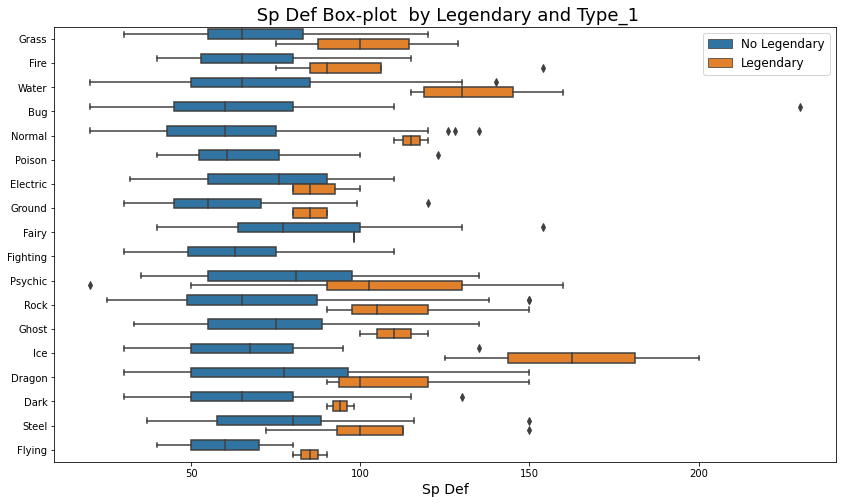

In [29]:
# box plot 

ax = sns.boxplot(x = 'Sp_Def', y = 'Type_1', hue = 'Legendary', data=pokemon, orient='h')

ax.figure.set_size_inches(14, 8)  

ax.set_title(' Sp Def Box-plot  by Legendary and Type_1', fontsize=18)    # title

ax.set_xlabel('Sp Def', fontsize=14)    #label X

ax.set_ylabel('', fontsize=14)          #label Y

handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['No Legendary', 'Legendary'], fontsize=12)

ax